In [18]:
pip install shap lime

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [20]:
import os

current_path = os.getcwd()
print("Current Path:", current_path)

Current Path: /sciclone/data10/iahewababarand/Applied_Machine_Learning_Project/ml_approches


In [21]:
df = pd.read_json("../data/adjacent_change_processed/output_file.json")
print(df.shape)
df.head()

(83676, 20)


,content_syntactic_blocstring,action_blocstring,changes_list_content_syntactic_,changes_list_action,src,userId,user_class,tweet_count,change_content_syntactic,change_action,change_change_dynamic_score,highest_change_in_content_syntactic,lowest_change_in_content_syntactic,standard_deviation_of_content_syntactic,highest_change_in_action,lowest_change_in_action,standard_deviation_of_action,diversity_action,diversity_content_syntactic,diversity_change_dynamics_score
0,(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmq...,rprp⚀pr□prrprrrprpprprprprprpprprprp□rprprprrr...,"[0.683772233983162, 0.6413313282702231, 0.7963...","{'content_syntactic': [0.683772233983162, 0.64...",astroturf,146048090,bot,274,0.452173,0.403716,0.860073,1.0,0.000000,0.337325,1.0,0.000000e+00,0.333447,0.653102,0.652532,0.450906
1,(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(m...,r□pr□rr□rp⚀r⚀TTTTTTT□r⚀p⚀π□p|⚀rr⚀rr⚀rr□r⚀r|⚀p⚀...,"[0.060087460014451005, 0.0, 0.0049628097900100...","{'content_syntactic': [0.060087460014451005, 0...",astroturf,797927149856403456,bot,275,0.481471,0.491328,0.586060,1.0,0.000000,0.432201,1.0,2.220446e-16,0.290351,0.707387,0.693840,0.151417
2,(mmt)(mmt)(qt)(qt)(qt)(mqt)(qt)(t)(qt)(qt)(Em)...,r□r⚀r⚀rr□rrr□r□r⚀rrr⚀r|⚁rrrrr□rrrrrr□rpprrrp□r...,"[0.405057793599891, 0.47776703213290606, 0.013...","{'content_syntactic': [0.405057793599891, 0.47...",astroturf,1046169889138868224,bot,277,0.431741,0.369664,1.066061,1.0,0.000000,0.435529,1.0,2.220446e-16,0.249736,0.676182,0.644029,0.297367
3,(mmt)(mmmmmmqt)(mmmmmmmmmqt)(mmt)(mmt)(qt)(mmm...,prrpp□rrrrrrrrrrrrrr□rr□rrr□rrprrrrrrr□prrrrrr...,"[0.628809264805127, 0.7846125524146781, 1.0, 1...","{'content_syntactic': [0.628809264805127, 0.78...",astroturf,1085010463128195072,bot,244,0.183893,0.425183,1.532266,1.0,0.000000,0.365115,1.0,4.622382e-02,0.349031,0.698081,0.620676,0.211830
4,(mmmmmmmqt)|(Em)|(t)(mmqt)(mt)(mmt)|(qt)(HUqt)...,p|⚁p|⚀p□p□p□p|⚁rrrrrrrrpr□prrprr□rrrprrprrrprp...,"[1.0, 1.0, 0.742674882267167, 0.92647853779061...","{'content_syntactic': [1.0, 1.0, 0.74267488226...",astroturf,1613166488,bot,245,0.812726,0.547337,0.791417,1.0,0.373736,0.207269,1.0,2.220446e-16,0.289094,0.680286,0.766445,0.627025


In [22]:
import pandas as pd

# Check class distribution
print("Class distribution before balancing:")
print(df['user_class'].value_counts())

# Identify the minority and majority classes dynamically
class_counts = df['user_class'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Split the dataset into majority and minority classes
df_minority = df[df['user_class'] == minority_class]
df_majority = df[df['user_class'] == majority_class]

# Find the size of the minority class
minority_size = len(df_minority)

# Downsample the majority class to the size of the minority class
df_majority_downsampled = df_majority.sample(n=minority_size, random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to mix classes
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("Class distribution after balancing:")
print(df['user_class'].value_counts())


Class distribution before balancing:
user_class
bot      44457
human    39219
Name: count, dtype: int64
Class distribution after balancing:
user_class
human    39219
bot      39219
Name: count, dtype: int64


In [23]:
# List of columns to select
columns_to_select = [
    "user_class", 
    "change_content_syntactic", 
    "change_action", 
    "change_change_dynamic_score", 
    "highest_change_in_content_syntactic", 
    "lowest_change_in_content_syntactic", 
    "standard_deviation_of_content_syntactic", 
    "highest_change_in_action", 
    "lowest_change_in_action", 
    "standard_deviation_of_action",
    'diversity_action', 
    'diversity_content_syntactic',
    'diversity_change_dynamics_score'
]

# Subset the DataFrame
df_subset = df[columns_to_select]
df_subset.head()

,user_class,change_content_syntactic,change_action,change_change_dynamic_score,highest_change_in_content_syntactic,lowest_change_in_content_syntactic,standard_deviation_of_content_syntactic,highest_change_in_action,lowest_change_in_action,standard_deviation_of_action,diversity_action,diversity_content_syntactic,diversity_change_dynamics_score
0,human,0.362324,0.332417,1.425641,1.0,0.0,0.465576,1.0,2.220446e-16,0.310297,0.610003,0.476402,1.493034
1,bot,0.913261,0.578304,1.212527,1.0,0.0,0.264812,1.0,2.220446e-16,0.311532,0.816009,0.882024,1.771815
2,human,0.735096,0.556716,0.610649,1.0,0.0,0.344333,1.0,2.220446e-16,0.307840,0.729642,0.727545,0.464326
3,human,0.756609,0.443949,0.404315,1.0,0.0,0.401664,1.0,2.220446e-16,0.335819,0.676542,0.735349,0.535012
4,bot,0.556876,0.429588,0.449173,1.0,0.0,0.448622,1.0,2.220446e-16,0.249554,0.861262,0.800880,1.819205


In [24]:
X = df_subset.drop(columns=['user_class'])  # Drop the target column
labels = df_subset['user_class']                # Target column
# X = df_subset[['change_change_dynamic_score']]  # Drop the target column

In [25]:
# Convert target labels to numeric
label_mapping = {'bot': 0, 'human': 1}
labels = labels.map(label_mapping)

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform testing data

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test_scaled)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multiclass

In [32]:
# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

Model Evaluation Metrics:
Accuracy: 0.8262
Precision: 0.8262
Recall: 0.8262
F1 Score: 0.8262

Confusion Matrix:
[[9765 2025]
 [2064 9678]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     11790
           1       0.83      0.82      0.83     11742

    accuracy                           0.83     23532
   macro avg       0.83      0.83      0.83     23532
weighted avg       0.83      0.83      0.83     23532


Feature Importances:
                                    Feature  Importance
5   standard_deviation_of_content_syntactic    0.146581
2               change_change_dynamic_score    0.129575
1                             change_action    0.105049
8              standard_deviation_of_action    0.104668
9                          diversity_action    0.103907
11          diversity_change_dynamics_score    0.101889
10              diversity_content_syntactic    0.100321
0                  change_content_syntac

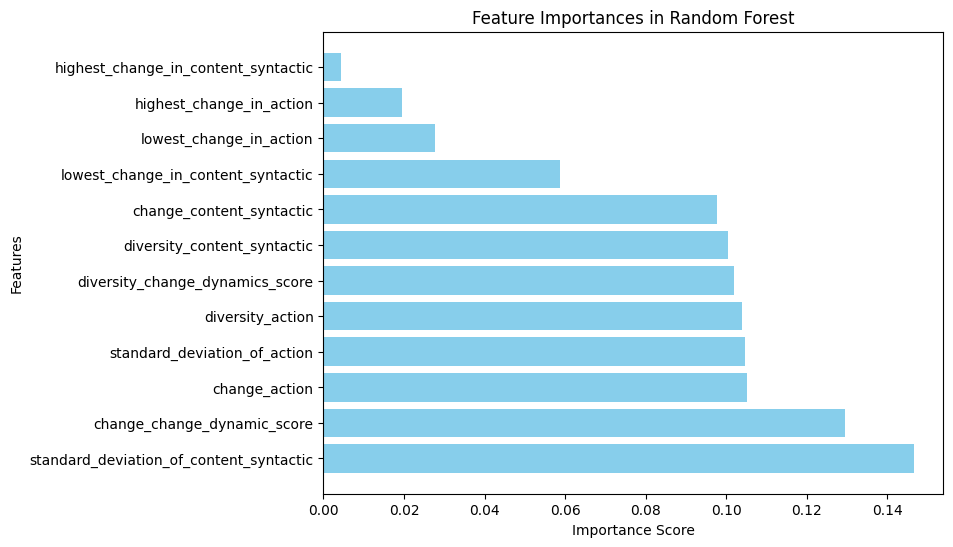

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest")
plt.show()


In [34]:
# import shap

# # Initialize the SHAP explainer
# explainer = shap.TreeExplainer(rf)  # Works well with tree-based models
# shap_values = explainer.shap_values(X)

# # Explain a single prediction
# instance = X.iloc[0]  # Choose the instance you want to explain
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X.iloc[0])